# Predictive modeling for loan approval

In [1]:
import pandas as pd

loan_data = pd.read_csv('/content/loan_sanction_train.csv')
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# 1. Collecting and Preparing Data

In [2]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# Imputing missing values for categorical variables using most frequent value
categorical_columns = ['Gender', 'Married', 'Dependents', 'Self_Employed']

for column in categorical_columns:
    most_frequent_value = loan_data[column].mode()[0] # calculate most freqeunt value(mode) - select first mode value
    loan_data[column].fillna(most_frequent_value, inplace=True)

loan_data[categorical_columns].isnull().sum()


Gender           0
Married          0
Dependents       0
Self_Employed    0
dtype: int64

In [4]:
# Regression imputation for loanAmount
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Split data - null vs not null
train_data = loan_data.dropna(subset=['LoanAmount'])
missing_data = loan_data[loan_data['LoanAmount'].isnull()]

# Use ApplicantIncome and CoapplicantIncome as predictors
X_train = train_data[['ApplicantIncome', 'CoapplicantIncome']]
y_train = train_data['LoanAmount']

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and replace missing values
data_used_for_predicting = missing_data[['ApplicantIncome', 'CoapplicantIncome']]
predicted_loan_amounts = model.predict(data_used_for_predicting)

loan_data.loc[loan_data['LoanAmount'].isnull(), 'LoanAmount'] = predicted_loan_amounts

loan_data['LoanAmount'].isnull().sum()


0

In [5]:
# Imputing missing values for Loan_Amount_Term and Credit_History using most frequent value - assume as categorical variable
loan_data['Loan_Amount_Term'].fillna(loan_data['Loan_Amount_Term'].mode()[0], inplace=True)
loan_data['Credit_History'].fillna(loan_data['Credit_History'].mode()[0], inplace=True)

print(loan_data[['Loan_Amount_Term', 'Credit_History']].isnull().sum())


Loan_Amount_Term    0
Credit_History      0
dtype: int64


In [6]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
# Feature Engineering - Create new feature used for loan approval process -> debt-to-income ratio (DTI)
# DTI = (ApplicantIncome + CoapplicantIncome) / LoanAmount -> ability to manage monthly payments and repay debts
loan_data['DTI'] = (loan_data['ApplicantIncome'] + loan_data['CoapplicantIncome']) / loan_data['LoanAmount']


In [8]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  DTI                614 non-null    float64
dtypes: float64(5), int64(1), object(8)
memory usage: 67.3+ KB


# 2. Exploratory Data Analysis

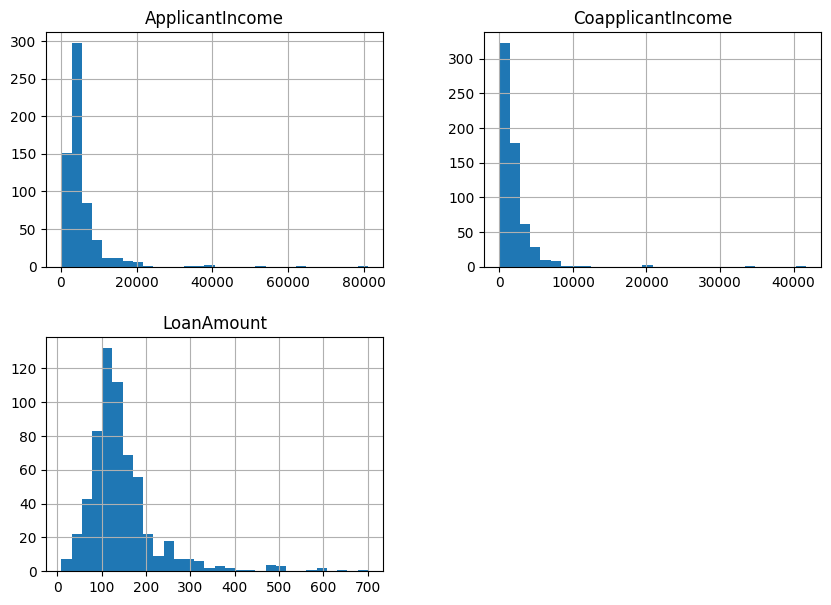

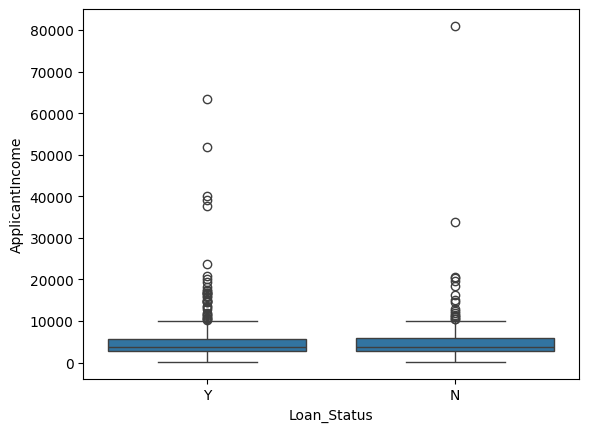

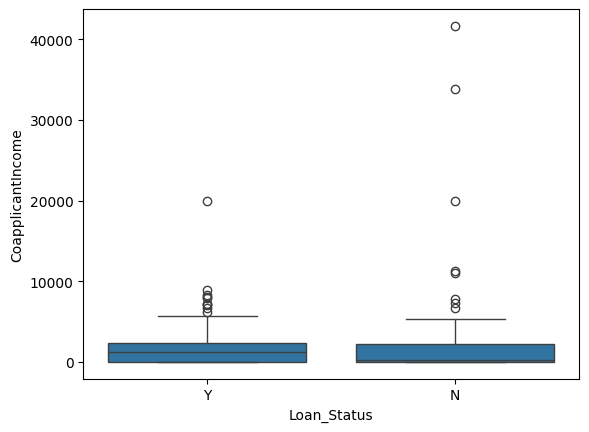

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical variables
loan_data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']].hist(bins=30, figsize=(10, 7))
plt.show()

# Box plots for Loan_Status - ApplicantIncome
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=loan_data)
plt.show()

# Box plots for Loan_Status - CoapplicantIncome
sns.boxplot(x='Loan_Status', y='CoapplicantIncome', data=loan_data)
plt.show()


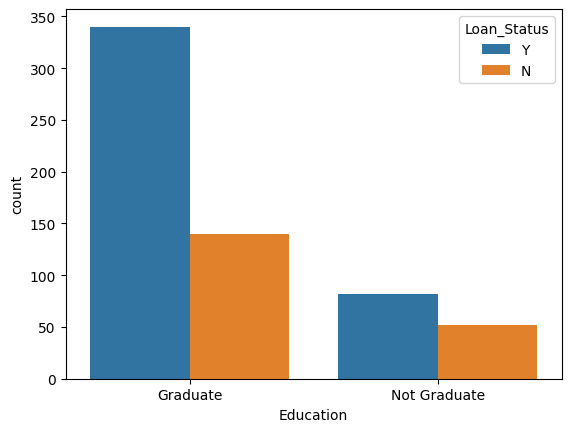

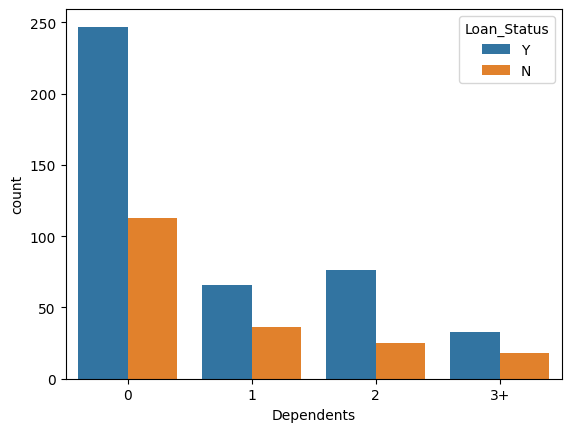

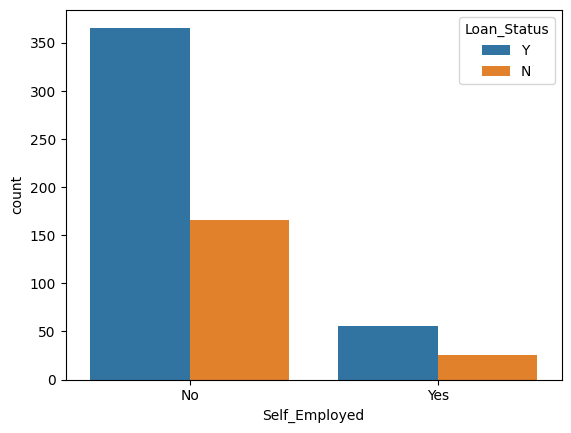

In [10]:
# Count plots for Education - Loan_Status
sns.countplot(x='Education', hue='Loan_Status', data=loan_data)
plt.show()

# Count plots for Dependents - Loan_Status
sns.countplot(x='Dependents', hue='Loan_Status', data=loan_data)
plt.show()

# Count plots for Self_Employed - Loan_Status
sns.countplot(x='Self_Employed', hue='Loan_Status', data=loan_data)
plt.show()

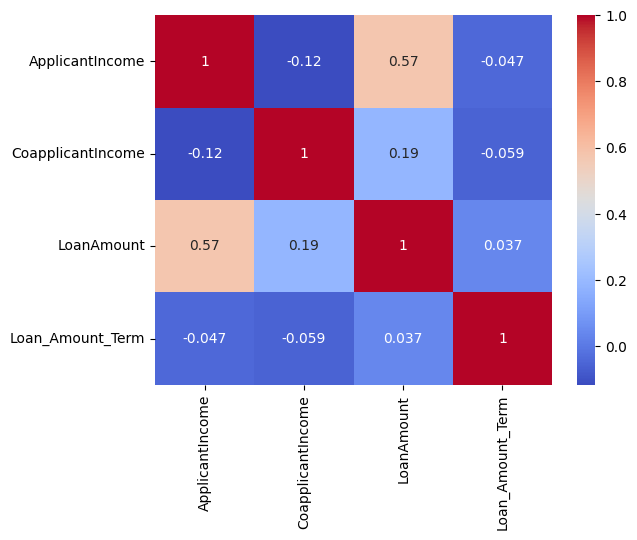

In [11]:
# Correlation matrix heatmap
correlation_matrix = loan_data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm') # Cool - negative correlations, Warm - positive correlations
plt.show()

# 3. Preprocess data for modeling

In [12]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Categorical columns - One-hot encoding
categorical_columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']
one_hot_encoder = OneHotEncoder()
encoded_categorical = one_hot_encoder.fit_transform(loan_data[categorical_columns]).toarray() # Learn unique categories in each column and convert the categorical values into binary vectors

# Add encoded columns back to the dataframe
encoded_df = pd.DataFrame(encoded_categorical, columns=one_hot_encoder.get_feature_names_out(categorical_columns))
loan_data = loan_data.join(encoded_df)

# Categorical variable with order - Label encoding
label_encoder = LabelEncoder()
loan_data['Dependents'] = label_encoder.fit_transform(loan_data['Dependents']) # Directly added


In [13]:
# Example checks after encoding
print(loan_data.columns)  # Check for new encoded columns
print(loan_data.isnull().sum())  # Check for missing values in the dataset

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'DTI', 'Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')
Loan_ID                    0
Gender                     0
Married                    0
Dependents                 0
Education                  0
Self_Employed              0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Property_Area              0
Loan_Status                0
DTI                        0
Gender_Female              0
Gender_Male                0
Married_No                 0
Marri

In [14]:
from sklearn.model_selection import train_test_split

# Select features and target variable for splitting
X = loan_data.drop(['Loan_Status', 'Loan_ID'] + categorical_columns, axis=1)  # Drop non-encoded categorical columns and target variable
y = loan_data['Loan_Status']  # 'Loan_Status' - target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
# Check after splitting
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)  # Shapes of splits
print(y_train.value_counts(normalize=True))  # Distribution of target in training set
print(y_test.value_counts(normalize=True))  #Distribution of target in testing set

(491, 18) (123, 18) (491,) (123,)
Y    0.696538
N    0.303462
Name: Loan_Status, dtype: float64
Y    0.650407
N    0.349593
Name: Loan_Status, dtype: float64


In [16]:
from sklearn.preprocessing import StandardScaler

# Standard Scaler
scaler = StandardScaler()

# Fit on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [17]:
# Check after scaling
print("Mean before scaling:", np.mean(X_train, axis=0))
print("Standard deviation before scaling:", np.std(X_train, axis=0))
print("Mean after scaling:", np.mean(X_train_scaled, axis=0))
print("Standard deviation after scaling:", np.std(X_train_scaled, axis=0))


Mean before scaling: Dependents                    0.729124
ApplicantIncome            5502.645621
CoapplicantIncome          1676.488635
LoanAmount                  148.411404
Loan_Amount_Term            340.765784
Credit_History                0.857434
DTI                          51.192274
Gender_Female                 0.189409
Gender_Male                   0.810591
Married_No                    0.364562
Married_Yes                   0.635438
Education_Graduate            0.778004
Education_Not Graduate        0.221996
Self_Employed_No              0.863544
Self_Employed_Yes             0.136456
Property_Area_Rural           0.287169
Property_Area_Semiurban       0.389002
Property_Area_Urban           0.323829
dtype: float64
Standard deviation before scaling: Dependents                    1.008087
ApplicantIncome            5926.906614
CoapplicantIncome          3174.403963
LoanAmount                   86.308148
Loan_Amount_Term             66.875817
Credit_History                0.

# 4. Model selection and training

In [25]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

log_reg = LogisticRegression()

# Train model
log_reg.fit(X_train_scaled, y_train)

# Predict testing set
y_pred = log_reg.predict(X_test_scaled)

# Evaluate model
log_reg_acc = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
print("Accuracy:", log_reg_acc)


              precision    recall  f1-score   support

           N       0.90      0.42      0.57        43
           Y       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123

Accuracy: 0.7804878048780488


Logistic Regression:

1) Accuracy - approximately 78%.

2) High precision for class 'N' (No approval), but recall is quite low -> predictions made for class 'N' are quite reliable, but the model misses a significant number of actual 'N' cases.

3) Model performs better for class 'Y' (Approval) with high recall which means it can identify most of the 'Y' cases.

In [38]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train_scaled, y_train)

y_pred_rf = rf.predict(X_test_scaled)

rf_acc = accuracy_score(y_test, y_pred_rf)
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", rf_acc)


              precision    recall  f1-score   support

           N       0.88      0.49      0.63        43
           Y       0.78      0.96      0.86        80

    accuracy                           0.80       123
   macro avg       0.83      0.73      0.74       123
weighted avg       0.81      0.80      0.78       123

Accuracy: 0.7967479674796748


Random Forest:

1) Accuracy - approximately 80%.

2) Balanced performance between precision and recall for class 'N'.

3) Good recall for class 'Y' which means it is quite good at identifying positive cases.

In [39]:
# Support Vector Machine (SVM)
from sklearn.svm import SVC

svm = SVC(kernel='linear')

svm.fit(X_train_scaled, y_train)

y_pred_svc = svm.predict(X_test_scaled)

svm_acc = accuracy_score(y_test, y_pred_svc)
print(classification_report(y_test, y_pred_svc))
print("Accuracy:", svm_acc)


              precision    recall  f1-score   support

           N       0.95      0.42      0.58        43
           Y       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

Accuracy: 0.7886178861788617


Support Vector Machine:

1) Accuracy - approximately 79%.

2) Highest precision for class 'N', but low recall.

3) Recall for class 'Y' is exceptionally high which means it identifies almost all 'Y' instances.

In [40]:
# Gradient Boosting Machine (GBM)
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

gbm.fit(X_train_scaled, y_train)

y_pred_gbm = gbm.predict(X_test_scaled)

gbm_acc = accuracy_score(y_test, y_pred_gbm)
print(classification_report(y_test, y_pred_gbm))
print("Accuracy:", gbm_acc)


              precision    recall  f1-score   support

           N       0.88      0.51      0.65        43
           Y       0.79      0.96      0.87        80

    accuracy                           0.80       123
   macro avg       0.83      0.74      0.76       123
weighted avg       0.82      0.80      0.79       123

Accuracy: 0.8048780487804879


Gradient Boosting Machine:

1) Accuracy - approximately 80.5% - highest accuracy.

2) Highest recall for class 'N'.

3) High recall for class 'Y.

# 5. Model evaluation

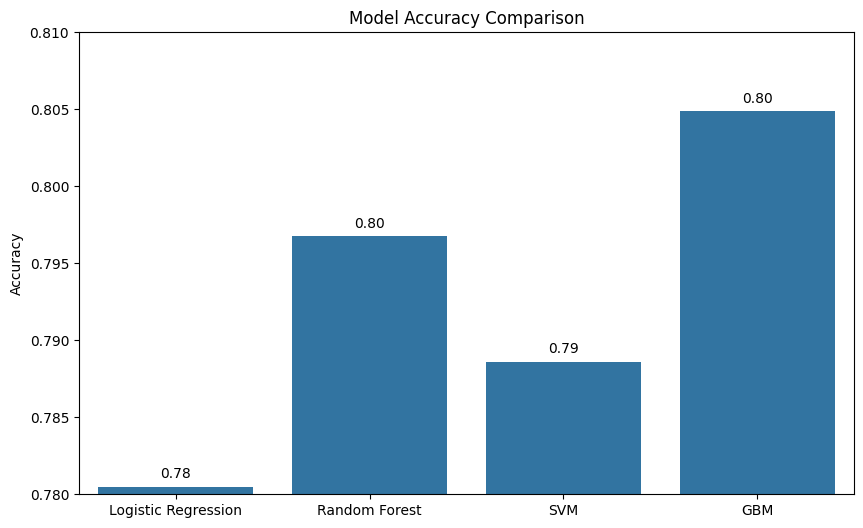

In [41]:
# Store each model's accuracy in a dictionary
accuracies = {
    'Logistic Regression': log_reg_acc,
    'Random Forest': rf_acc,
    'SVM': svm_acc,
    'GBM': gbm_acc
}

# Plotting
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')

# Y-axis zoom
plt.ylim(0.78, 0.81)

# Add accuracy values on top
for bar in bars.patches:
    bars.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2., bar.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')

plt.show()

# 6. Interpretation and Report

Among four different models: Logistic Regression, Random Forest, SVM, and GBM, GBM model slightly outperforms the other models in overall accuracy and provides a good balance between precision and recall.

Analysis for 4 models:

*   Random Forest, GBM -> Good performance in overall accuracy and recall for class 'Y'. Less likely to miss out on identifying loan approvals.

*   SVM -> High precision for class 'N' which means it makes less prone to false positives in predicting loan denials. However it has low recall for class 'N' which means it misses a significant number of actual loan denials.

*   Logistic Regression -> It has slightly less performance, but it is balanced overall. Like SVM, it has high precision for class 'N', but fails to capture a lot of actual loan denials.

Given the analysis above in step 4 of accuracy and recall, GBM model's high recall for class 'N' and best overall accuracy makes the GBM model to be the most suitable choice among 4 different models.